In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append("../")

from utils.preprocessing import *

In [17]:
pose_csv = 'Z:/KayCei/HDC/AH3-HET/120423-LIGHTS OFF/2023-12-04_16-38-52DLC_resnet50_bottomup_clearSep21shuffle1_1030000.csv'
pose_df = pd.read_csv(pose_csv, header=[0, 1, 2], index_col=0)
pose = np.array([pose_df.iloc[:, c] for c in np.arange(pose_df.shape[1]) if not np.mod(c, 3)==2]).T
print(pose.shape)

(234295, 12)


### original data table

In [18]:
pose_df[::3].head(40)

scorer    DLC_resnet50_bottomup_clearSep21shuffle1_1030000              \
bodyparts                                            snout               
coords                                                   x           y   
0                                              1109.789795   54.564445   
3                                              1119.622437   44.254963   
6                                              1109.149414   54.509850   
9                                               512.684448   59.252224   
12                                              515.438599   57.648834   
15                                              522.056396   47.199387   
18                                              524.679810   45.626610   
21                                              527.604187   40.829277   
24                                              532.590210   48.350395   
27                                             1112.576904   47.633553   
30                                             1112.181763   48.652271   
33                                              550.233521   77.500000   
36                                              560.448242   85.493111   
39                                              568.242981   93.442436   
42                                              576.615417   97.380928   
45                                              582.080383  102.157997   
48                                              588.152649  106.694702   
51                                              593.448547  108.214317   
54                                              593.513733  107.549171   
57                                              593.504456  107.717796   
60                                              593.477600  107.690552   
63                                              593.511414  107.680252   
66                                              593.495178  107.703331   
69                                              593.480652  107.700485   
72                                              727.481445  121.175438   
75                                              748.695557  120.950569   
78                                              772.379578  116.328949   
81                                              804.886169  109.727249   
84                                              826.746826   96.137802   
87                                              841.639709   89.369514   
90                                              861.044861   80.255615   
93                                              883.645813   69.903412   
96                                              905.340027   57.233158   
99                                              926.270935   42.788132   
102                                             949.418091   39.266716   
105                                             967.133911   34.273357   
108                                             976.262207   36.390392   
111                                             984.630493   36.527519   
114                                             988.747437   40.314671   
117                                             991.139526   39.800209   

scorer                                                                  \
bodyparts            right-forepaw                        left-forepaw   
coords    likelihood             x           y likelihood            x   
0           0.557929    510.958008   71.725311   0.999999   529.955383   
3           0.190261    509.389099   71.300827   1.000000   529.511536   
6           0.651197    507.541016   69.597946   1.000000   521.204041   
9           0.997195    506.066559   69.506935   1.000000   519.431946   
12          1.000000    494.505432   78.749306   1.000000   518.138977   
15          0.999999    493.260498   74.195435   1.000000   521.507751   
18          0.999995    493.694092   72.968697   1.000000   522.937256   
21          1.000000    495.973206   73.187256   0.999995   524.921570   
24 

### after removing likelihood and headers

In [19]:
pose[:5, :]

array([[1109.78979492,   54.5644455 ,  510.95800781,   71.72531128,
         529.9553833 ,   85.70500946,  475.81970215,  145.33653259,
         536.32055664,   98.30149078,  502.31048584,  154.55351257],
       [1109.7869873 ,   54.55326843,  510.93765259,   71.75450134,
         529.94458008,   85.66468048,  475.86871338,  145.40907288,
         536.32550049,   98.3013916 ,  502.32437134,  154.53465271],
       [1113.24108887,   48.71399689,  509.07006836,   72.28524017,
         527.17810059,   82.21566772,  475.04983521,  145.91467285,
         536.79614258,   98.3367157 ,  502.27050781,  154.31266785],
       [1119.62243652,   44.25496292,  509.38909912,   71.30082703,
         529.51153564,   86.37261963,  473.69488525,  145.03538513,
         536.22955322,   97.92068481,  501.92422485,  153.47677612],
       [1119.98034668,   44.35979843,  508.1060791 ,   70.97753143,
         529.71990967,   88.39152527,  474.15194702,  145.79187012,
         537.36212158,   98.507164  ,  501.7

### plot

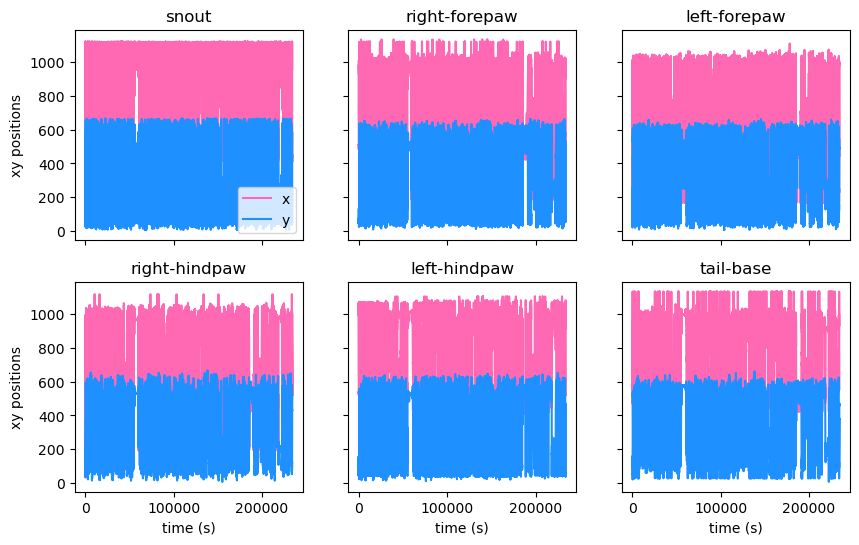

In [20]:
# plot all example files
bodyparts_names = ['snout',
                   'right-forepaw', 'left-forepaw', 
                   'right-hindpaw', 'left-hindpaw', 
                   'tail-base']
cols = 3
rows = int(np.ceil(int(pose.shape[1]/2)/cols))
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(10, 6), sharex=True, sharey=True)
for row in range(rows):
    for col in range(cols):
        try:
            ax[row, col].plot(pose[:, 2*count], c='hotpink', label='x')
            ax[row, col].plot(pose[:, 2*count+1], c='dodgerblue', label='y')
            if col == 0 and row == 0:
                ax[row, col].legend()
            ax[row, col].set_title(bodyparts_names[count])
            if col == 0:
                ax[row, col].set_ylabel('xy positions')

            if row == rows-1:
                ax[row, col].set_xlabel('time (s)')
            count += 1
        except IndexError:
            pass

plt.show()



### save processed pose file 

In [21]:
np.save('../processed_data/pose_video_exp_16.npy', pose)